### 1. Outline the Analysis Steps:
- We’ll import libraries, load the data, and visualize it.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scripts.oile_price_eda_script import BrentOilPricesEDA

In [3]:
# Load Data
file_path = '../data/BrentOilPrices.csv'  
processor = BrentOilPricesEDA(file_path=file_path)

In [4]:
data = processor.load_data()
data

2025-02-21 16:03:48,453 - INFO - Data loaded successfully.
2025-02-21 16:03:48,454 - INFO - Data loading completed in 0:00:00.044205.


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


### Data Preprocessing

In [5]:
# Convert Date column to datetime format with inferred format
data = processor.format_date()

2025-02-21 16:03:53,420 - INFO - Date formatting completed in 0:00:00.229005.


In [6]:
# Check for missing values and fill or drop if necessary
print("Missing values:", data.isnull().sum())
data['Price'] = data['Price'].fillna(method='ffill')  # Forward fill for any missing price data

Missing values: Price    0
dtype: int64


### Exploratory Data Analysis (EDA)

##### Descriptive Statistics: 
- Calculate the mean, median, variance, and standard deviation of daily oil prices over time.

In [7]:
processor.describe_data()

2025-02-21 16:03:58,048 - INFO - Generating descriptive statistics.


,Price
count,9011.00
mean,48.42
std,32.86
min,9.10
25%,19.05
50%,38.57
75%,70.09
max,143.95


##### Trend Analysis: 
- Plot the time series to identify visible trends, seasonality, or patterns in oil prices over the years.

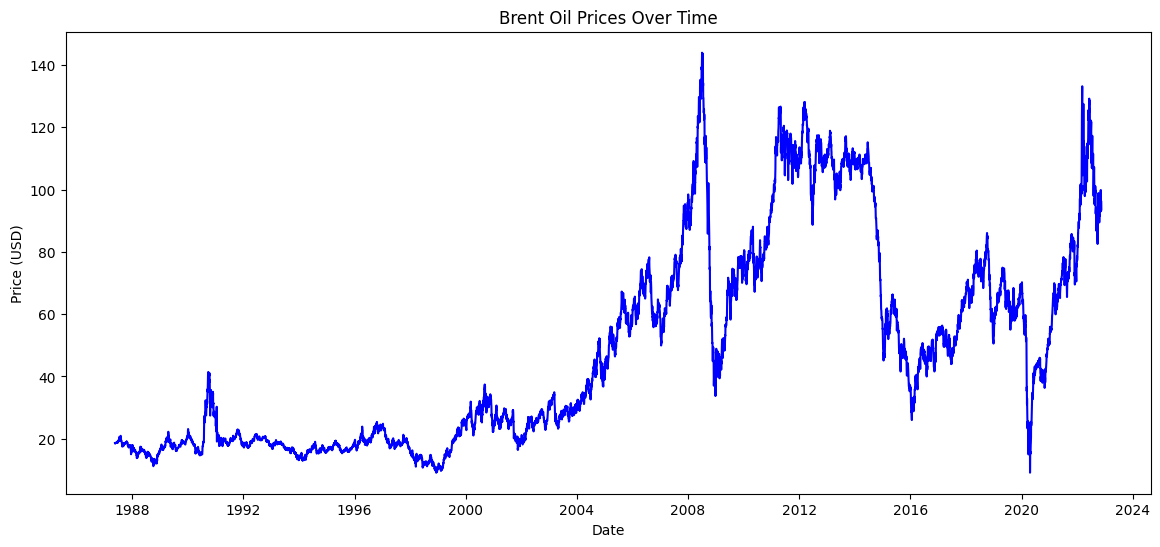

2025-02-21 16:04:01,275 - INFO - Time series plot generated successfully.


In [8]:
# Plot the time series of Brent oil prices
processor.plot_time_series()

2025-02-21 16:04:05,277 - INFO - Performing seasonal decomposition.


<Figure size 1400x1000 with 0 Axes>

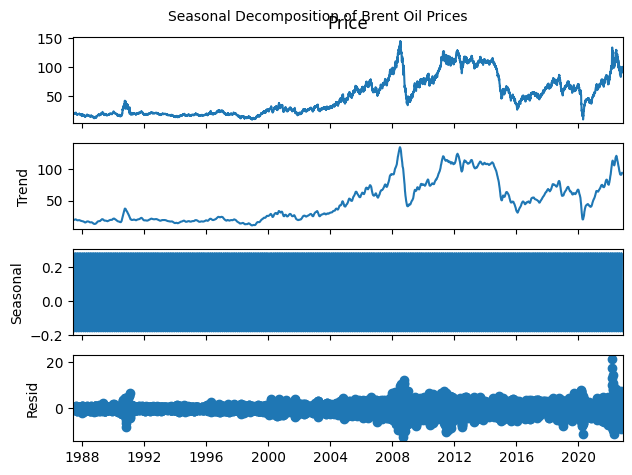

In [9]:
processor.seasonal_decomposition()

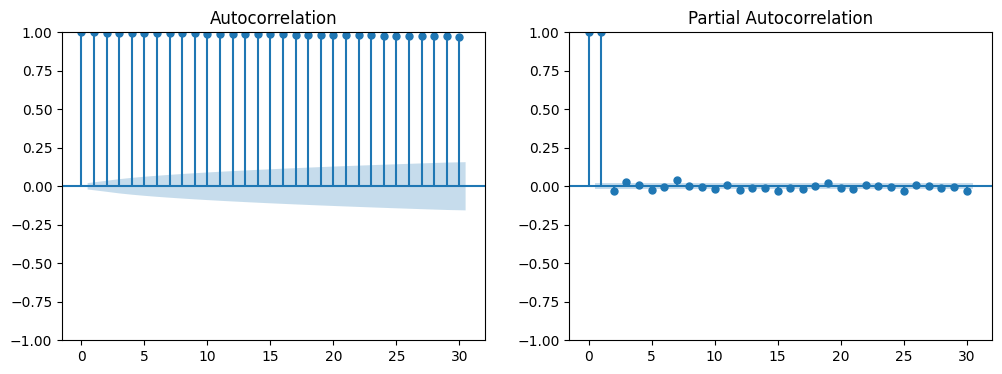

2025-02-21 16:04:09,129 - INFO - ACF and PACF plots generated successfully.


In [10]:
processor.plot_acf_pacf()

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

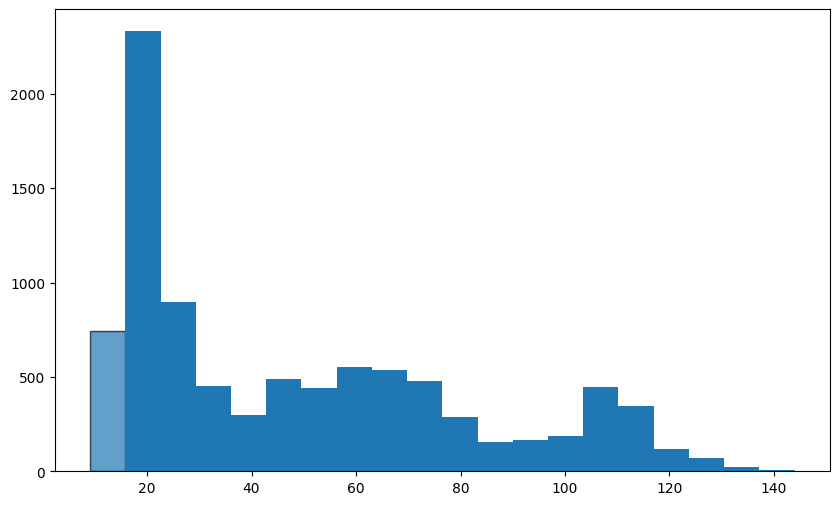

In [11]:
processor.plot_histogram()

In [12]:
processor.plot_cusum

<bound method BrentOilPricesEDA.plot_cusum of <scripts.oile_price_eda_script.BrentOilPricesEDA object at 0x000001F58EB03590>>

### 2. Stationarity Check:
- Check if the data is stationary using the Augmented Dickey-Fuller (ADF) test, which is necessary for ARIMA.

##### Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods:-

- **a)** It should have constant mean.
- **b)** It should have constant variance or standard deviation.
- **c)** Auto-covariance should not depend on time.

2025-02-21 16:08:22,890 - INFO - Performing Augmented Dickey-Fuller test for stationarity.
2025-02-21 16:08:23,703 - INFO - ADF Statistic: -1.9938560113924675
2025-02-21 16:08:23,703 - INFO - p-value: 0.28927350489340287
2025-02-21 16:08:23,704 - INFO - Data is non-stationary; applying first differencing.


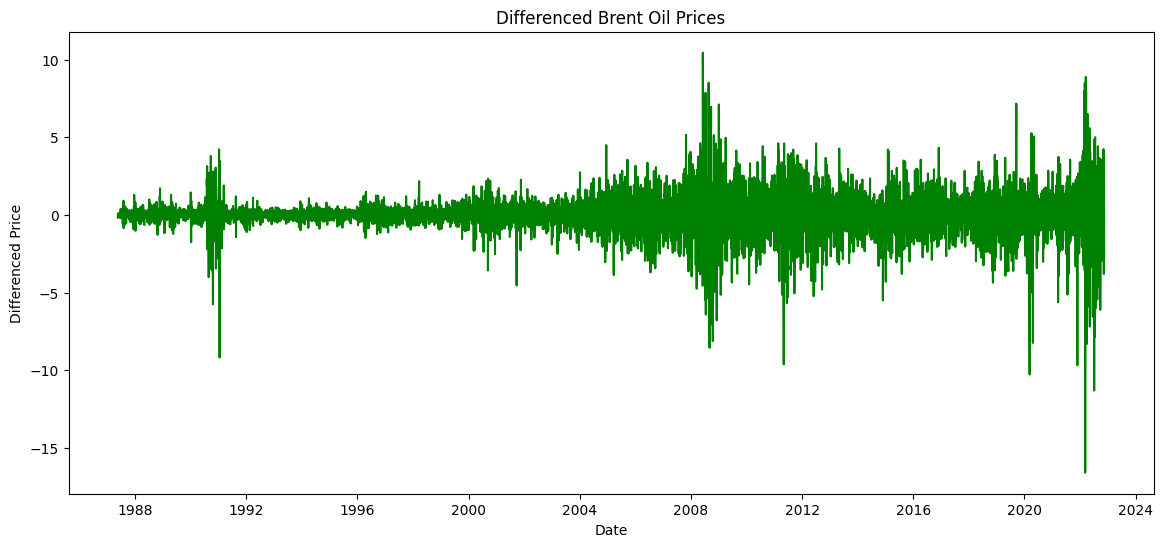

In [13]:
processor.check_stationarity()

### 3. Understand Model Inputs, Outputs, and Limitations

In this section, we define the inputs and outputs for our models and clarify the limitations to set realistic expectations for the results.

#### Model Inputs
1. **Date**: The date of each observation, essential for time series models to capture sequential data.
2. **Price**: The primary variable we are analyzing, representing the Brent oil price at each date.

For the **ARIMA model** (AutoRegressive Integrated Moving Average), which is used for trend analysis:
- Inputs: The `price` column, and we may use differencing to make the series stationary (necessary for ARIMA).
  
For the **GARCH model** (Generalized Autoregressive Conditional Heteroskedasticity), which models volatility:
- Inputs: If the data is non-stationary, we’ll use the differenced `price` series, capturing variations that can indicate volatility.

#### Model Outputs
- **ARIMA**: The output is a forecasted price series over a specified time horizon. This provides trend-based predictions, helping to capture upward or downward patterns.
- **GARCH**: The output is a volatility forecast, giving insights into potential price fluctuation levels. This is helpful for understanding risk or variability in the price.

#### Model Limitations
1. **Assumptions of Stationarity**: Both ARIMA and GARCH require that the data is stationary, meaning the mean and variance do not change over time. If the data is not stationary, preprocessing steps (like differencing) are needed, which may impact interpretability.
   
2. **Sensitivity to Model Parameters**: ARIMA’s accuracy depends on correct selection of parameters (p, d, q), and GARCH models rely on volatility persistence parameters. Poor parameter selection can lead to inaccurate forecasts.

3. **Lack of External Variables**: The models do not account for external factors such as economic indicators, geopolitical events, or policy changes, which may also affect oil prices.

4. **Forecast Horizon**: The models are generally more accurate for short-term forecasts. Over longer periods, prediction uncertainty increases.

By defining these aspects, we ensure a comprehensive understanding of how our data and models align, and we set realistic expectations for stakeholders regarding the models’ predictive capabilities.

### Change Point Analysis

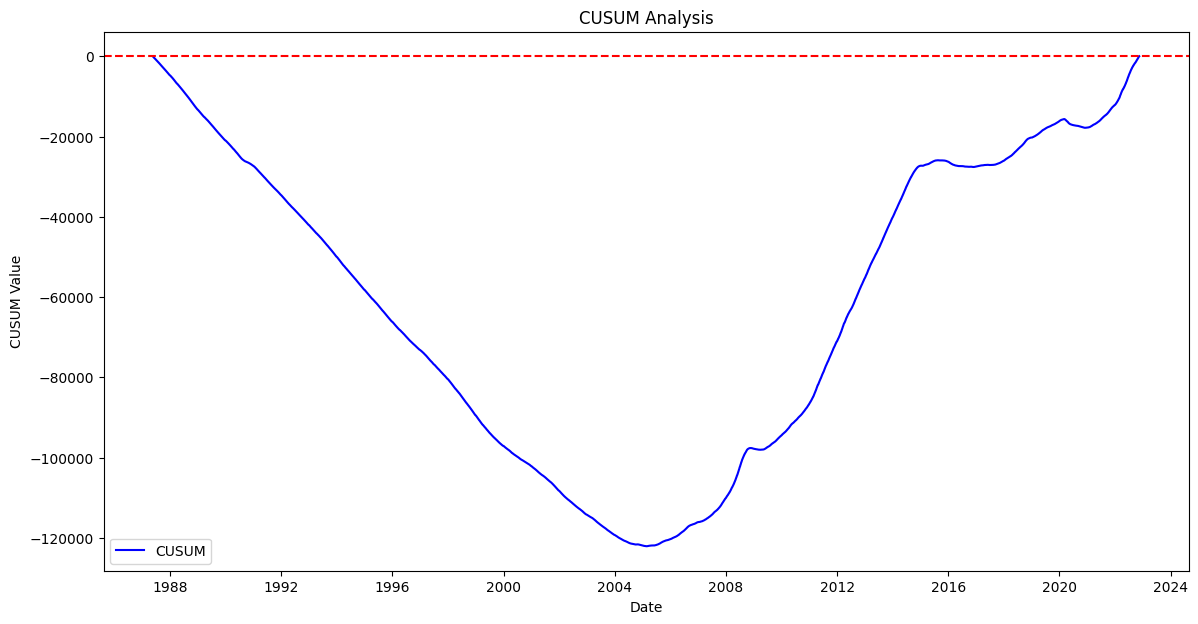

In [14]:
# Call CUSUM Method
processor.plot_cusum()

2025-02-21 16:08:47,873 - INFO - Performing change point analysis.


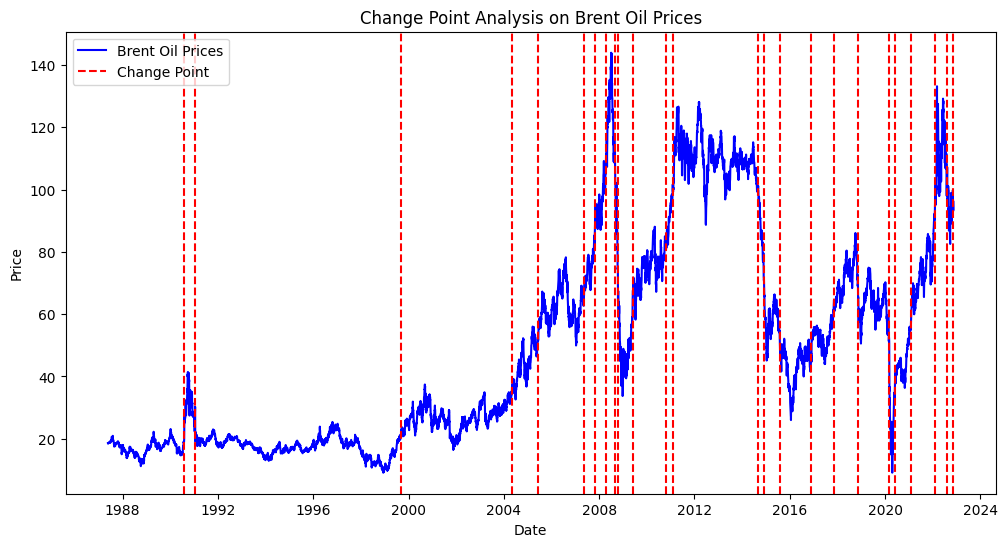

In [15]:
# apply change point analysis
processor.change_point_analysis()

In [16]:
# Calculate daily returns (percentage change)
data['Daily_Return'] = data['Price'].pct_change() * 100
data['Daily_Return'].dropna(inplace=True)

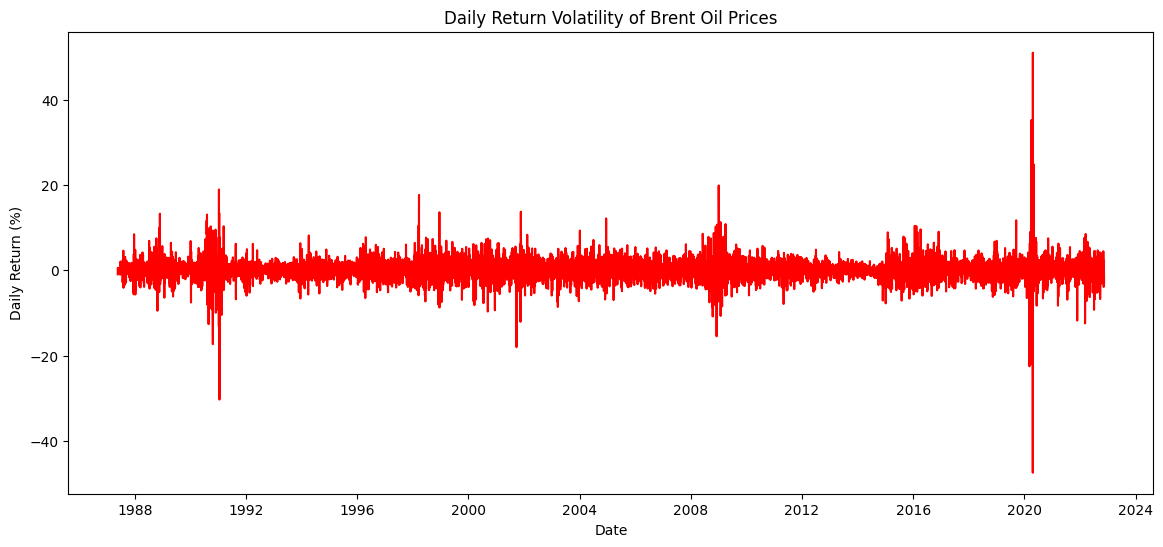

In [17]:
# Plot daily return volatility
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Daily_Return'], color='red')
plt.title("Daily Return Volatility of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.show()

### Identify and mark key events (example of a few events)

In [18]:
# Create a list of significant events from 1987 to 2022
events_data = {
    "1987-05-20": "Brent crude oil first traded on ICE",
    "1989-11-09": "Fall of the Berlin Wall",
    "1990-08-02": "Invasion of Kuwait by Iraq",
    "1991-01-16": "Start of the Gulf War",
    "1991-12-31": "End of the Soviet Union",
    "1997-07-02": "Asian Financial Crisis begins",
    "1998-08-05": "Asian Financial Crisis impacts oil prices",
    "2001-09-11": "Terrorist Attacks on US",
    "2003-03-20": "Invasion of Iraq by US Forces",
    "2004-01-01": "OPEC agrees to production cuts",
    "2005-08-29": "Hurricane Katrina impacts US oil production",
    "2006-07-12": "Israel-Lebanon conflict affects oil prices",
    "2007-10-15": "OPEC maintains production quota",
    "2008-07-11": "Record Oil Prices Hit $147 per Barrel",
    "2008-09-15": "Lehman Brothers collapse, global financial crisis",
    "2009-01-01": "OPEC production cuts continue",
    "2011-02-15": "Libyan Civil War disrupts oil exports",
    "2012-05-18": "Sanctions on Iran impact oil supply",
    "2014-06-24": "Geopolitical tensions in Iraq",
    "2015-11-30": "OPEC agrees to maintain production levels",
    "2016-11-30": "OPEC Agreement to Cut Production",
    "2017-01-20": "Trump inaugurated, affecting energy policies",
    "2019-09-14": "Drone attack on Saudi oil facilities",
    "2020-03-20": "COVID-19 pandemic begins impacting global demand",
    "2020-04-20": "Oil price crash; WTI futures turn negative",
    "2020-11-09": "Pfizer announces COVID-19 vaccine efficacy",
    "2021-07-01": "OPEC+ agrees to gradually increase production",
    "2022-02-24": "Russia invades Ukraine; oil prices spike",
}

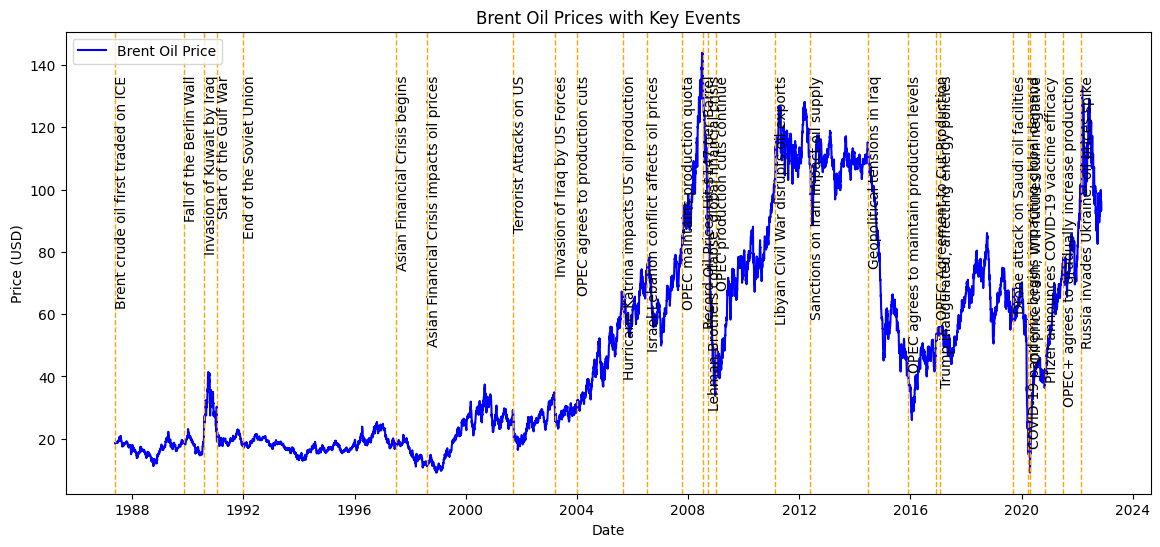

In [19]:
# Plot events on price time series
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Price'], color='blue', label='Brent Oil Price')
for date, label in events_data.items():
    plt.axvline(pd.to_datetime(date), color='orange', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), data['Price'].max()*0.95, label, rotation=90, verticalalignment='top')
plt.title("Brent Oil Prices with Key Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### 2. Understand the Model and Data

##### Familiarize with Models for Time Series Analysis (ARIMA, GARCH)

In [20]:
# Example GARCH model (requires ARCH package)
from arch import arch_model

# Fit a GARCH model
garch_model = arch_model(data['Price'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit()
print(garch_result.summary())

ModuleNotFoundError: No module named 'arch'

### Time Series Modeling - ARIMA

In [14]:
# import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# ARIMA requires stationary time series, so calculate log returns
data['Log_Returns'] = np.log(data['Price']).diff().dropna()

# Fit ARIMA model
arima_model = ARIMA(data['Log_Returns'].dropna(), order=(1,1,1))
arima_result = arima_model.fit()
print("ARIMA Summary:", arima_result.summary())

e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\

ARIMA Summary:                                SARIMAX Results                                
Dep. Variable:            Log_Returns   No. Observations:                 9010
Model:                 ARIMA(1, 1, 1)   Log Likelihood               20255.180
Date:                Fri, 01 Nov 2024   AIC                         -40504.360
Time:                        22:34:19   BIC                         -40483.042
Sample:                             0   HQIC                        -40497.107
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0138      0.003     -5.289      0.000      -0.019      -0.009
ma.L1         -0.9999      0.008   -118.595      0.000      -1.016      -0.983
sigma2         0.0007   4.97e-06    1

### Task-1 succsessfuly Completed